In [6]:
import numpy as np
import pandas as pd
import datetime
import glob
import os
 
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib.dates 
from matplotlib.ticker import MultipleLocator, FuncFormatter, NullFormatter
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter

import analyze_log_functions as alf

# Import data 

In [7]:
log_path = os.path.join( os.getcwd()   , 'log_files\\') 
log_files = glob.glob( log_path+ '*.csv')  

df = pd.DataFrame()
for file in log_files :
    df_temp = pd.read_csv( file, index_col=None, header=0)  
    df = df.append(df_temp ,sort=False)   
    
df.tail()

,date,start time,Task,Label,Duration (s)
186,2020/04/19,18:13:21,NaN,Other,0
187,2020/04/19,18:13:22,NaN,Other,0
188,2020/04/19,18:13:23,NaN,Other,0
189,2020/04/19,18:20:16,NaN,Other,2
190,2020/04/19,18:20:22,NaN,Other,1


# Data conversion

In [8]:
# remove all items shorter than 60 seconds
bool_short_duration = df['Duration (s)'] < 60
df = df[~bool_short_duration]

df['date'] = pd.to_datetime(df['date'] )  
df['Duration (hh:mm:ss)'] = pd.to_timedelta(df['Duration (s)'],'s') 

df['Week'] = df['date'].dt.strftime("%V")

df.tail()

,date,start time,Task,Label,Duration (s),Duration (hh:mm:ss),Week
168,2020-04-17,15:52:59,Daniel lab meeting,label6,1500,00:25:00,16
169,2020-04-17,16:18:01,Daniel lab meeting,label6,1042,00:17:22,16
170,2020-04-17,16:52:00,mathematica derivations,label2,1500,00:25:00,16
171,2020-04-17,17:24:01,flex pend writedown,label2,1103,00:18:23,16
172,2020-04-19,17:22:11,1231,Other,155,00:02:35,16


 # Set plotting parameters

In [9]:
# make colorscheme 
cols = np.array([[166,206,227], 
[31,120,180], 
[178,223,138], 
[51,160,44], 
[251,154,153], 
[227,26,28], 
[253,191,111], 
[255,127,0], 
[202,178,214], 
[106,61,154], 
[255,255,153]]) /255  

labels = df['Label'].unique()     
label_dict = {}
for label,col in zip(labels,cols): 
    label_dict[label] = col 

# Plot tracked time for multiple weeks

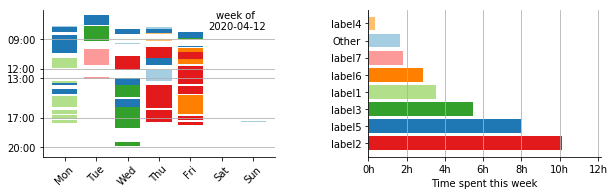

In [10]:
weeks = df['Week'].unique()  

fig, ax= plt.subplots( len(weeks), 2, figsize =(10,3),squeeze=False) 

for i, week in enumerate(weeks):  
    bool_week = df['Week'] == week
    df_week = df[bool_week].copy() 
    
    # plot left axis
    alf.plot_week_tasks( ax[i,0], df_week, label_dict )
    alf.plot_time_spent_weekly( ax[i,1], df_week, label_dict )
plt.subplots_adjust(left=None, bottom=.2, right=None, top=None, wspace=.4, hspace=None)

# Plot tracked time for a single week

Saving to: figs\week_analysis.png


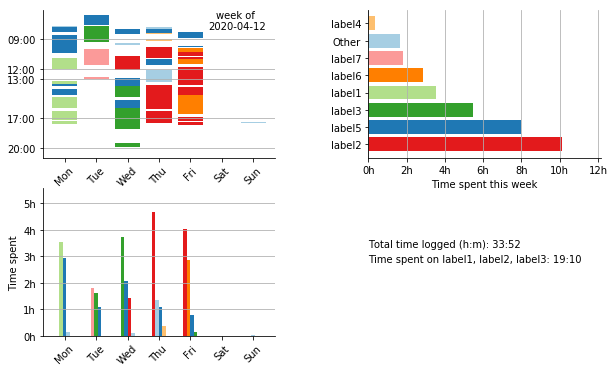

In [11]:
bool_week = df['Week'] == weeks[0]
df_week = df[bool_week].copy() 

import json
        # load currently stored task labels 
work_label_filename = os.path.join( log_path, 'work_labels.json' )
with open(  work_label_filename , 'r') as f:  
     work_labels = json.load(f)    

fig, ax = plt.subplots(2, 2, squeeze=False, figsize =(10,6))

# plot 3 subplots
alf.plot_week_tasks( ax[0,0], df_week, label_dict ) 
alf.plot_time_spent_weekly(ax[0,1], df_week, label_dict  )
alf.plot_time_spent_daily( ax[1,0], df_week, label_dict  ) 
alf.plot_week_text(ax[1,1], df_week, 
                   select_labels= work_labels, selected_text='Time spent on '+', '.join(work_labels))

# adjust layout 
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.4, hspace=None) 
 
# save figure
fig_fullname = os.path.join( 'figs', 'week_analysis') 
print('Saving to: ' + fig_fullname + '.png') 
plt.savefig( fig_fullname+ '.png',
        format='png', dpi=300,
        transparent=  True,             
        bbox_inches = 'tight', pad_inches = 0, 
           ) 